# **Bank transactions**
## Model 1: Logistic regression

Carlos Garavito
***

In [2]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

# set no limit to raw display with pandas
pd.set_option('display.max_rows', None)

# define working paths
PROJECT_PATH = os.getcwd()
RAWDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'raw')
INTERIM_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'interim')
PROCDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'processed')

In [3]:
#
# Read data
#

# read train data
X_train=pd.read_csv(os.path.join(PROCDATA_PATH, 'train', 'X_train.csv'))
y_train=pd.read_csv(os.path.join(PROCDATA_PATH, 'train', 'y_train.csv'))

# read test data
X_test=pd.read_csv(os.path.join(PROCDATA_PATH, 'test', 'X_test.csv'))
y_test=pd.read_csv(os.path.join(PROCDATA_PATH, 'test', 'y_test.csv'))

# read validation data
X_CV=pd.read_csv(os.path.join(PROCDATA_PATH, 'validation', 'X_CV.csv'))
y_CV=pd.read_csv(os.path.join(PROCDATA_PATH, 'validation', 'y_CV.csv'))


## Train model: logistic regresion
***

In [4]:
# scale features
standard_scaler = StandardScaler()

X_train_scaler = standard_scaler.fit_transform(X_train)
X_test_scaler = standard_scaler.fit_transform(X_test)
X_CV_scaler = standard_scaler.fit_transform(X_CV)

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

AUC for k =  1e-10 is 0.5951186238453924
AUC for k =  1e-09 is 0.5951186238453924
AUC for k =  1e-08 is 0.5951186238453924
AUC for k =  1e-07 is 0.5951186238453924
AUC for k =  1e-06 is 0.5959909139182252
AUC for k =  1e-05 is 0.6039936148314223
AUC for k =  0.0001 is 0.6465573845720166
AUC for k =  0.001 is 0.6901895228168164
AUC for k =  0.01 is 0.6918247553116867
AUC for k =  0.1 is 0.6886850092761946
AUC for k =  1 is 0.6876820002491133
AUC for k =  10 is 0.688183504762654
AUC for k =  100 is 0.688183504762654
AUC for k =  1000 is 0.688183504762654
AUC for k =  10000 is 0.688183504762654


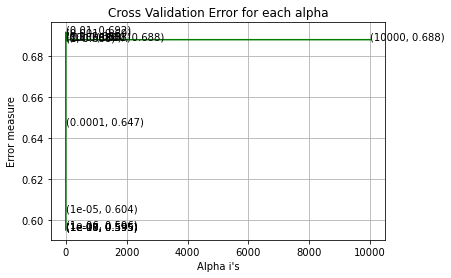

In [5]:
alpha = [10 ** x for x in range(-10, 5)]
cv_auc_array=[]
for i in alpha:
    logisticReg_model=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticReg_model.fit(X_train_scaler,y_train)
    sigmoid_classifier = CalibratedClassifierCV(logisticReg_model, method="sigmoid")
    sigmoid_classifier.fit(X_train_scaler, y_train)
    predict_y = sigmoid_classifier.predict(X_CV_scaler)
    cv_auc_array.append(roc_auc_score(y_CV, predict_y))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [6]:
logisticReg_model=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticReg_model.fit(X_train_scaler,y_train)
sigmoid_classifier = CalibratedClassifierCV(logisticReg_model, method="sigmoid")
sigmoid_classifier.fit(X_train_scaler, y_train)
    
predict_y = sigmoid_classifier.predict(X_train_scaler)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y))

predict_y = sigmoid_classifier.predict(X_CV_scaler)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_CV, predict_y))

predict_y = sigmoid_classifier.predict(X_test_scaler)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y))

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


For values of best alpha =  0.01 The train AUC is: 0.6814842408954781
For values of best alpha =  0.01 The cross validation AUC is: 0.6918247553116867
For values of best alpha =  0.01 The test AUC is: 0.6979729028239202


In [11]:
plt.figure(figsize=(20,5))
weights = logisticReg_model.coef_[0]

df_weights = pd.DataFrame(zip(X_train.columns, weights), columns=["feature", "weight"]).sort_values(by = "weight", ascending = False)
df_weights["abs"] = df_weights["weight"].apply(lambda x: x.__abs__())
df_weights.sort_values(by = "abs", ascending = False).style.background_gradient(cmap='Blues')

,feature,weight,abs
1,duration,1.639536,1.639536
6,euribor3m,-1.138616,1.138616
48,month_may,-0.394498,0.394498
47,month_mar,0.185938,0.185938
5,cons.conf.idx,0.182653,0.182653
59,poutcome_success,0.176865,0.176865
46,month_jun,0.149676,0.149676
50,month_oct,0.144241,0.144241
3,pdays,-0.129166,0.129166
45,month_jul,0.127246,0.127246


<Figure size 1440x360 with 0 Axes>

## Prediction over unseen data
***

In [ ]:
# read new data
new_data = pd.read_csv(os.path.join(RAWDATA_PATH, "bank_campaign_3_registers.csv"))
new_data = new_data.drop(columns=["emp.var.rate", "nr.employed", "cons.price.idx", "subscribed"])
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m
0,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-50.8,1.028
1,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-50.8,1.028
2,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-50.8,1.028


In [ ]:
# one hot encoding values 
new_data_dummie  =  pd.get_dummies(new_data)

# add missing dimensions to new_data encoded dataframe
missing_dim = list(set(X_train.columns)- set(new_data_dummie))

for dim in missing_dim:
    new_data_dummie[dim] = 0

new_data_dummie


,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_retired,job_technician,marital_married,...,month_jul,loan_unknown,month_aug,job_management,job_unknown,month_sep,default_unknown,education_basic.4y,education_basic.9y,job_student
0,56,189,2,999,0,-50.8,1.028,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,44,442,1,999,0,-50.8,1.028,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,74,239,3,999,1,-50.8,1.028,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

new_data_dummie_scaler = standard_scaler.fit_transform(new_data_dummie)
predict_y = sigmoid_classifier.predict(new_data_dummie_scaler)
predict_y

array([0, 0, 0], dtype=int64)